In [1]:
import matplotlib.pyplot as plt
import numpy as np

from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr
from multisoc.generate.utils import make_composite_index

from paper_plots import get_analytical_inequalities_2D_Sym_h

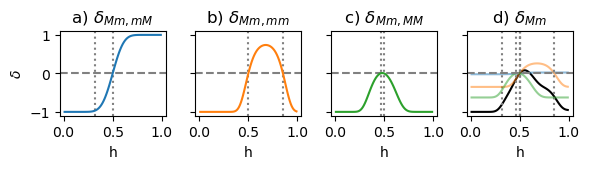

In [2]:
f1m = 0.3
f2m =  0.48
corr = 0.94
N = 500

multidim_deltas_lst_50k, onedim_deltas_lst_50k, multidim_deltas_1v1_lst_50k, multidim_deltas_1v1_prob_upper_lst_50k, multidim_deltas_1v1_prob_lower_lst_50k, av_degs_lst_50k = get_analytical_inequalities_2D_Sym_h(
    N,
    f1m,
    f2m,
    corr,
    get_probs = True,
    get_av_degs=True
    )

marginal_distributions = [[f1m,1-f1m],[f2m,1-f2m]]
F = consol_comp_pop_frac_tnsr(marginal_distributions,corr)
comp_indices = make_composite_index(F.shape)

focal_group = (1,0)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(0.6*10,0.6*3))

plt.sca(ax4)
plt.plot(np.linspace(0.01,0.99,100),multidim_deltas_lst_50k[(1,0)],color="k")
plt.xlabel("h")
plt.axvline(0.5,ls=":",color="grey")
plt.ylim(-1.1,1.1)

s = (0,1)
second_cut_point = (F[(1-focal_group[0],1-focal_group[1])] - F[(1-s[0],1-s[1])])/(2*F[focal_group]+2*F[(1-focal_group[0],1-focal_group[1])]-1)

plt.sca(ax1)
plt.xlabel("h")
plt.locator_params(nbins=3)
plt.title(r"a) $\delta_{Mm,mM}$")
plt.axvline(0.5,ls=":",color="grey")
plt.axhline(0,ls="--",color="grey")
if 0<=second_cut_point<=1:
    plt.axvline(second_cut_point,ls=":",color="grey")
plt.plot(np.linspace(0.01,0.99,100),np.array(multidim_deltas_1v1_lst_50k[focal_group,s]),color="C0",zorder=20)
plt.ylim(-1.1,1-1)
plt.ylabel(r"$\delta$")

prefactor = F[s]/(1-F[focal_group])
y = prefactor*np.array(multidim_deltas_1v1_lst_50k[focal_group,s])

plt.sca(ax4)
ax4.plot(np.linspace(0.01,0.99,100),y,"-",color="C0",alpha=0.5)
plt.xlabel("h")
plt.axvline(0.5,ls=":",color="grey")
plt.ylim(-1.1,1.1)
if 0<=second_cut_point<=1:
    plt.axvline(second_cut_point,ls=":",color="grey")

s = (0,0)
second_cut_point = (F[(1-focal_group[0],1-focal_group[1])] - F[(1-s[0],1-s[1])])/(2*F[focal_group]+2*F[(1-focal_group[0],1-focal_group[1])]-1)

plt.sca(ax2)
plt.xlabel("h")
plt.locator_params(nbins=3)
plt.title(r"b) $\delta_{Mm,mm}$")
plt.axvline(0.5,ls=":",color="grey")
plt.axhline(0,ls="--",color="grey")
if 0<=second_cut_point<=1:
    plt.axvline(second_cut_point,ls=":",color="grey")
plt.plot(np.linspace(0.01,0.99,100),np.array(multidim_deltas_1v1_lst_50k[focal_group,s]),color="C1")
plt.ylim(-1.1,1-1)

prefactor = F[s]/(1-F[focal_group])
y = prefactor*np.array(multidim_deltas_1v1_lst_50k[focal_group,s])

plt.sca(ax4)
plt.plot(np.linspace(0.01,0.99,100),y,"-",color="C1",alpha=0.5)
plt.xlabel("h")
plt.axvline(0.5,ls=":",color="grey")
plt.ylim(-1.1,1.1)
if 0<=second_cut_point<=1:
    plt.axvline(second_cut_point,ls=":",color="grey")

s = (1,1)
second_cut_point = (F[(1-focal_group[0],1-focal_group[1])] - F[(1-s[0],1-s[1])])/(2*F[focal_group]+2*F[(1-focal_group[0],1-focal_group[1])]-1)

plt.sca(ax3)
plt.xlabel("h")
plt.locator_params(nbins=3)
plt.title(r"c) $\delta_{Mm,MM}$")
plt.axvline(0.5,ls=":",color="grey")
plt.axhline(0,ls="--",color="grey")
if 0<=second_cut_point<=1:
    plt.axvline(second_cut_point,ls=":",color="grey")
plt.plot(np.linspace(0.01,0.99,100),np.array(multidim_deltas_1v1_lst_50k[focal_group,s]),color="C2")
plt.ylim(-1.1,1-1)

prefactor = F[s]/(1-F[focal_group])
y = prefactor*np.array(multidim_deltas_1v1_lst_50k[focal_group,s])

plt.sca(ax4)
plt.locator_params(nbins=3)
plt.title(r"d) $\delta_{Mm}$")
plt.plot(np.linspace(0.01,0.99,100),y,"-",color="C2",alpha=0.5)
plt.xlabel("h")
plt.axvline(0.5,ls=":",color="grey")
plt.ylim(-1.1,1.1)
if 0<=second_cut_point<=1:
    plt.axvline(second_cut_point,ls=":",color="grey")

# plt.plot(np.linspace(0.01,0.99,100),np.gradient(np.gradient(y))*100,"-")

plt.axhline(0,ls="--",color="grey")

plt.tight_layout()
plt.savefig(f"temp/FigS3.png",dpi=600,)
plt.show()